In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SHEET 1 — Discount vs. No Discount (Vertical A)

Objective: Evaluate how offering discounts affects market opportunity in Vertical A.

In [2]:
df = pd.read_excel('ESD_Data_Analysis.xlsx', sheet_name='Sheet 1')
df.head()

,Parent Customer Number,Customer Sub-Vertical,Industry,Second Level Dealer?,Fleet Size,Covered at Parent Level,Parent in CAT?,Discount - Parent,Market Potential (USD),Sales (USD)
0,1,Vertical A,Industry G,No,20+ Units,Yes,Yes,0.00,552053.000000,189248.484040
1,2,Vertical A,Industry W,No,20+ Units,Yes,Yes,0.00,482917.502141,143925.676649
2,3,Vertical A,Industry G,No,20+ Units,Yes,Yes,0.06,422414.992048,84088.635400
3,4,Vertical A,Industry G,No,Managed,Yes,Yes,0.00,394918.069432,72290.821680
4,5,Vertical A,Industry G,No,20+ Units,Yes,Yes,0.09,625669.235369,315636.963180


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parent Customer Number,3576.0,1788.500000,1032.446609,1.0000,894.75,1788.500000,2682.250000,3576.000000
Discount - Parent,3576.0,0.003248,0.012540,0.0000,0.00,0.000000,0.000000,0.142500
Market Potential (USD),3576.0,5837.921407,36545.674728,0.0000,0.00,124.595874,760.815276,999246.005631
Sales (USD),3576.0,3837.773276,34221.616812,-484.6996,0.00,18.747190,233.301145,999621.659960


In [ ]:
vertical_a_df = df[df["Customer Sub-Vertical"].str.strip().str.lower() == "vertical a"]
vertical_a_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parent Customer Number,249.0,1136.983936,1286.273208,1.0,127.000000,596.000000,1861.000000,3576.000000
Discount - Parent,249.0,0.002671,0.012107,0.0,0.000000,0.000000,0.000000,0.090000
Market Potential (USD),249.0,48430.559955,119894.446790,0.0,326.827556,4763.763276,25337.054691,999246.005631
Sales (USD),249.0,34466.118848,115050.482657,0.0,0.000000,224.211680,8761.970140,999621.659960


In [5]:
with_discount = vertical_a_df[vertical_a_df["Discount - Parent"] > 0]
without_discount = vertical_a_df[vertical_a_df["Discount - Parent"] == 0]

In [ ]:
with_discount.describe().T

,count,mean,std,min,25%,50%,75%,max
Parent Customer Number,15.0,866.000000,1407.151885,3.00000,23.000000,94.000000,948.000000,3518.000000
Discount - Parent,15.0,0.044333,0.024847,0.01000,0.030000,0.040000,0.060000,0.090000
Market Potential (USD),15.0,138388.831232,179391.780566,0.00000,18887.962599,60594.376191,154888.474487,625669.235369
Sales (USD),15.0,48987.024878,81902.375354,19.50102,8538.730200,17142.189680,42955.503140,315636.963180


In [7]:
without_discount.describe().T

,count,mean,std,min,25%,50%,75%,max
Parent Customer Number,234.0,1154.354701,1279.455577,1.0,140.50000,614.000000,1957.000000,3576.000000
Discount - Parent,234.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
Market Potential (USD),234.0,42664.004104,113190.406702,0.0,323.51337,3497.289183,19902.339318,999246.005631
Sales (USD),234.0,33535.291538,116924.145067,0.0,0.00000,161.991060,4891.513935,999621.659960


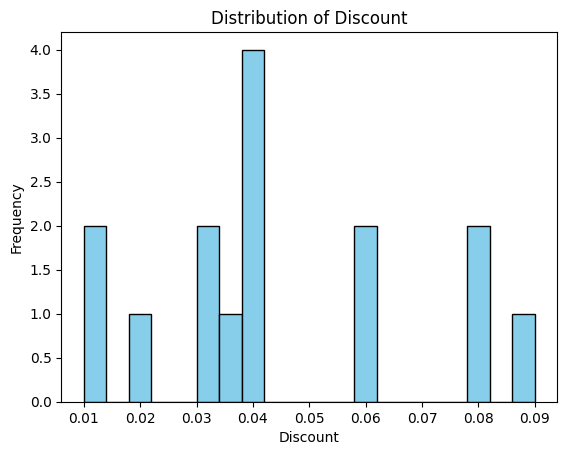

In [8]:
plt.hist(with_discount['Discount - Parent'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Discount')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

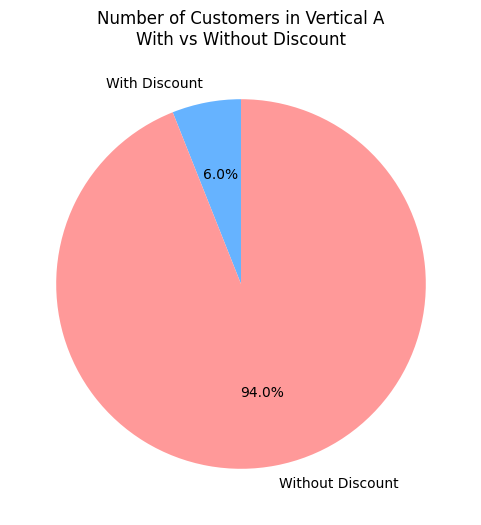

In [ ]:
labels = ['With Discount', 'Without Discount']
sizes = [with_discount.shape[0], without_discount.shape[0]]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title("Number of Customers in Vertical A\nWith vs Without Discount")
plt.show()

In [10]:
avg_with = with_discount["Market Potential (USD)"].mean()
avg_without = without_discount["Market Potential (USD)"].mean()


print(f"Avg Market Potential (With Discount): ${avg_with:,.0f}")
print(f"Avg Market Potential (Without Discount): ${avg_without:,.0f}")

Avg Market Potential (With Discount): $138,389
Avg Market Potential (Without Discount): $42,664


Impact of Discount on Sales

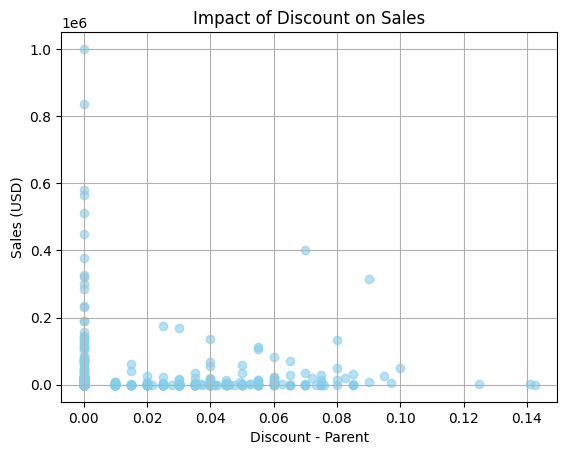

In [11]:
plt.scatter(x=df['Discount - Parent'], y=df['Sales (USD)'], alpha=0.6, c='skyblue')  
plt.xlabel('Discount - Parent')  
plt.ylabel('Sales (USD)')  
plt.title('Impact of Discount on Sales')  
plt.grid(True)  
plt.show()  

Discount - Parent > 0.1, suggesting that discounts beyond 10% are rare and might not be a common practice. Higher discounts (>5%), sales values remain relatively low and do not exhibit a clear upward trend.

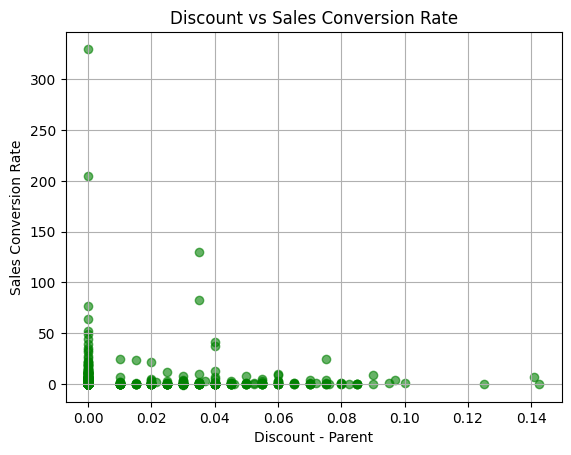

In [ ]:
df['Sales Conversion Rate'] = df['Sales (USD)'] / df['Market Potential (USD)']  

plt.scatter(x=df['Discount - Parent'], y=df['Sales Conversion Rate'], alpha=0.6, c='green')  
plt.xlabel('Discount - Parent')  
plt.ylabel('Sales Conversion Rate')  
plt.title('Discount vs Sales Conversion Rate')  
plt.grid(True)  
plt.show()  

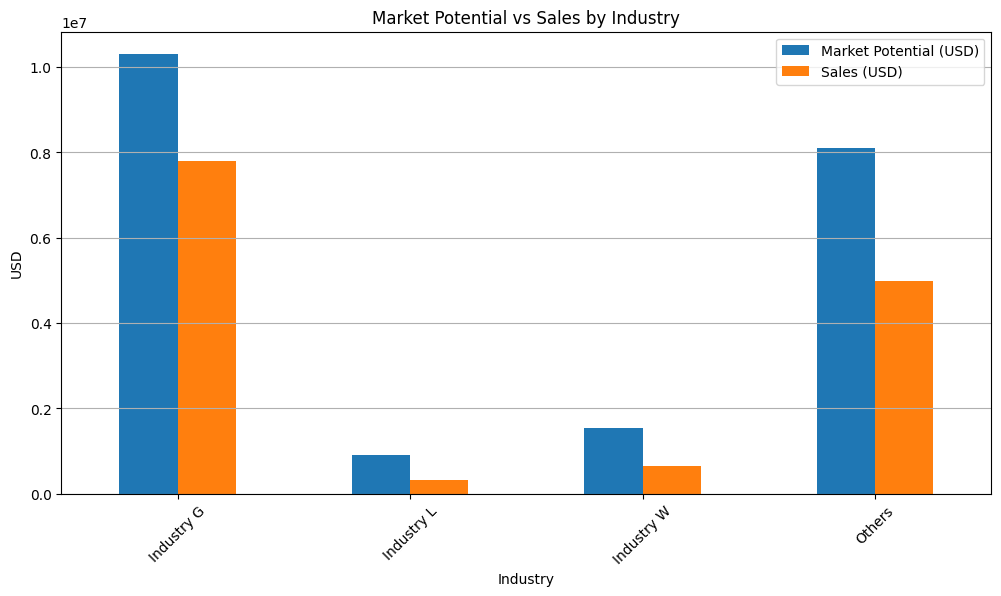

In [13]:
# Group by Industry and calculate totals  
industry_analysis = df.groupby('Industry')[['Market Potential (USD)', 'Sales (USD)']].sum().reset_index()  

# Bar plot: Market Potential and Sales by Industry  
industry_analysis.plot(kind='bar', x='Industry', figsize=(12, 6))  
plt.title('Market Potential vs Sales by Industry')  
plt.ylabel('USD')  
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()  

Industry G represents the largest market potential and sales, but the gap suggests there’s room to improve sales performance further. The "Others" category has high market potential, second only to Industry G, but there remains a notable gap between potential and sales.

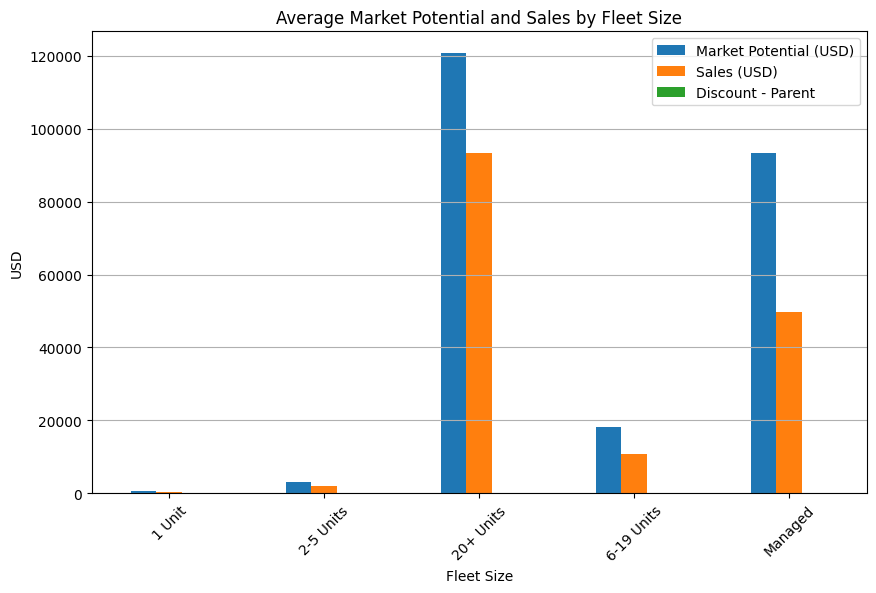

In [14]:
# Group by Fleet Size  
fleet_analysis = df.groupby('Fleet Size')[['Market Potential (USD)', 'Sales (USD)', 'Discount - Parent']].mean().reset_index()  

# Bar plot: Average Market Potential and Sales by Fleet Size  
fleet_analysis.plot(kind='bar', x='Fleet Size', figsize=(10, 6))  
plt.title('Average Market Potential and Sales by Fleet Size')  
plt.ylabel('USD')  
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()  

he 20+ Units fleet size offers the highest market potential, but the gap suggests untapped opportunities. Smaller fleets (1 Unit and 2-5 Units) show limited potential and may not warrant significant focus unless strategically important. 

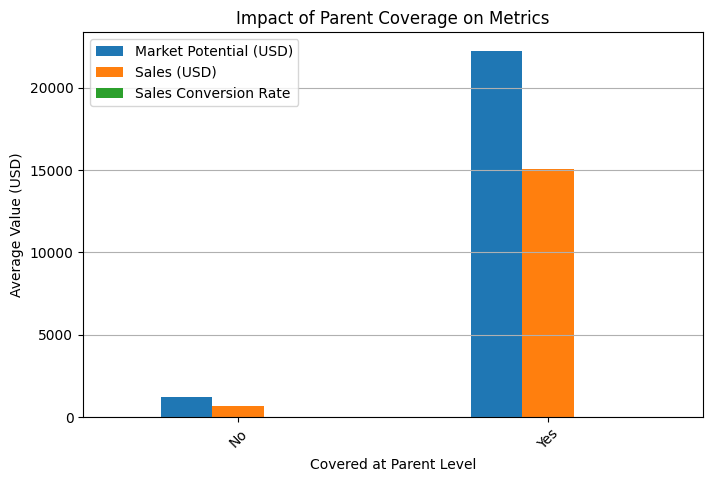

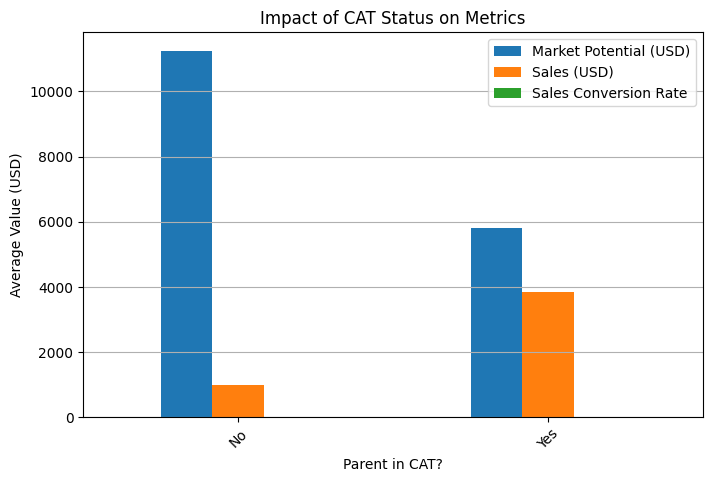

In [ ]:

parent_coverage_analysis = df.groupby('Covered at Parent Level')[['Market Potential (USD)', 'Sales (USD)', 'Sales Conversion Rate']].mean()  
cat_status_analysis = df.groupby('Parent in CAT?')[['Market Potential (USD)', 'Sales (USD)', 'Sales Conversion Rate']].mean()  

parent_coverage_analysis.plot(kind='bar', figsize=(8, 5), title='Impact of Parent Coverage on Metrics')  
plt.ylabel('Average Value (USD)')  
plt.xticks(rotation=45)  
plt.grid(axis='y')  

cat_status_analysis.plot(kind='bar', figsize=(8, 5), title='Impact of CAT Status on Metrics')  
plt.ylabel('Average Value (USD)')  
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()  

While customers with parents in CAT exhibit higher sales conversion rates and better utilization of market potential, non-CAT parents represent larger opportunities that are currently underutilized. By investigating inefficiencies in targeting non-CAT parents and leveraging successful strategies used for CAT-covered parents, overall sales performance can be improved. 

Parent-level coverage is strongly correlated with higher market potential, sales, and sales conversion rates, making this segment a critical priority for growth. Customers without parent coverage show poor performance across all metrics and require targeted strategies to improve engagement and efficiency.

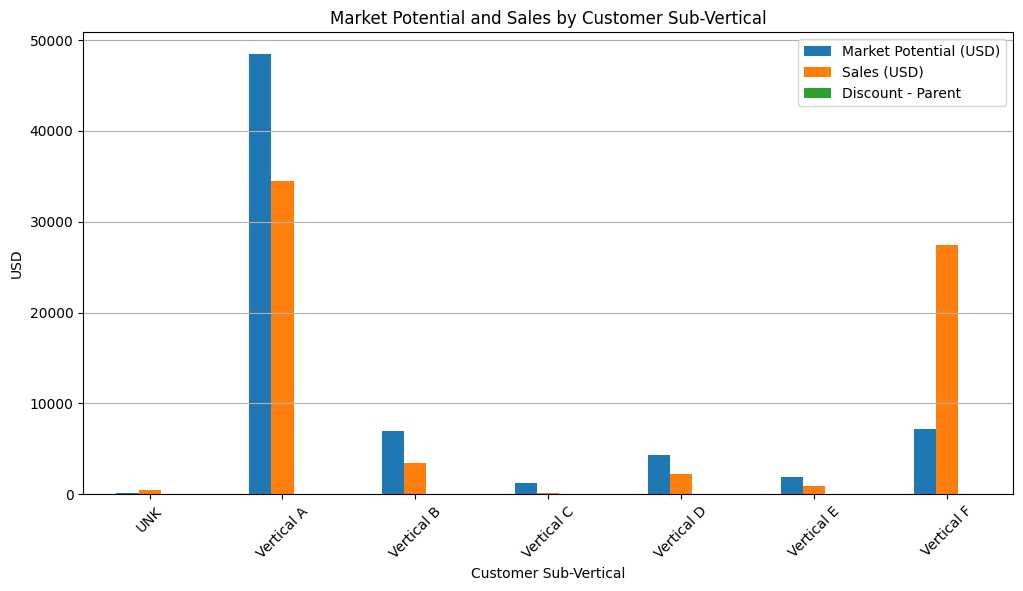

In [ ]:
sub_vertical_analysis = df.groupby('Customer Sub-Vertical')[['Market Potential (USD)', 'Sales (USD)', 'Discount - Parent']].mean().reset_index()  

sub_vertical_analysis.plot(kind='bar', x='Customer Sub-Vertical', figsize=(12, 6))  
plt.title('Market Potential and Sales by Customer Sub-Vertical')  
plt.ylabel('USD')  
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()  

It can be clearly seen that dicsount is offered for comapnies with higher market potential

In [17]:
fleet_discount_summary = (
    vertical_a_df
    .groupby(["Fleet Size", "Discount - Parent"])
    .size()
    .reset_index(name="Customer Count")
)
print(fleet_discount_summary)

    Fleet Size  Discount - Parent  Customer Count
0       1 Unit              0.000              94
1       1 Unit              0.030               1
2    2-5 Units              0.000              53
3    2-5 Units              0.010               1
4    20+ Units              0.000              35
5    20+ Units              0.010               1
6    20+ Units              0.040               3
7    20+ Units              0.060               1
8    20+ Units              0.090               1
9   6-19 Units              0.000              38
10  6-19 Units              0.030               1
11  6-19 Units              0.040               1
12  6-19 Units              0.060               1
13  6-19 Units              0.080               2
14     Managed              0.000              14
15     Managed              0.020               1
16     Managed              0.035               1


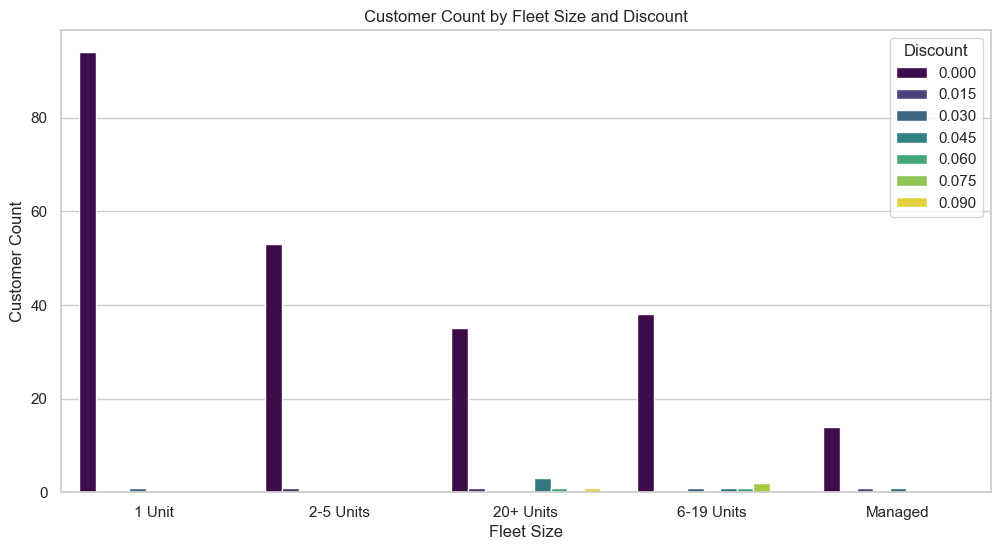

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.barplot(x="Fleet Size", y="Customer Count", hue="Discount - Parent", data=fleet_discount_summary, palette="viridis")

plt.title("Customer Count by Fleet Size and Discount")
plt.xlabel("Fleet Size")
plt.ylabel("Customer Count")
plt.legend(title="Discount")
plt.show()

The majority of customers receive no discount, particularly in smaller fleet sizes (1 Unit and 2-5 Units). Discounts are more commonly used in larger fleets (20+ Units and Managed), suggesting that they are reserved for strategic accounts or high-value opportunities.

/var/folders/0t/g5p3lp7j739f033nsc__94br0000gn/T/ipykernel_45600/3328912523.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  industry_discount = vertical_a_df.groupby("Industry").apply(
/var/folders/0t/g5p3lp7j739f033nsc__94br0000gn/T/ipykernel_45600/3328912523.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Average Discount", y="Industry", data=industry_discount, palette="magma")


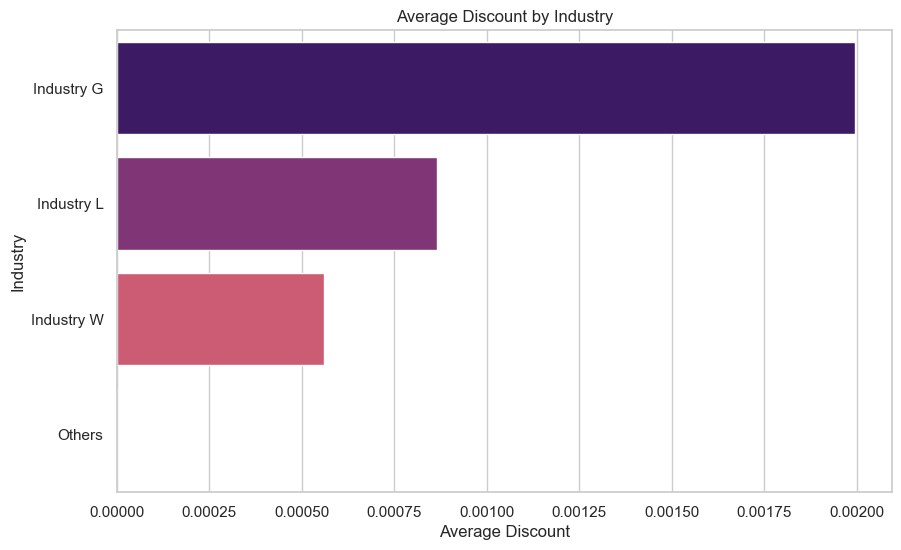

In [ ]:
industry_discount = vertical_a_df.groupby("Industry").apply(
    lambda x: (x["Discount - Parent"] * x["Parent Customer Number"]).sum() / x["Parent Customer Number"].sum()
).reset_index(name="Average Discount")

industry_discount = industry_discount.sort_values(by="Average Discount", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Average Discount", y="Industry", data=industry_discount, palette="magma")
plt.title("Average Discount by Industry")
plt.xlabel("Average Discount")
plt.ylabel("Industry")
plt.show()

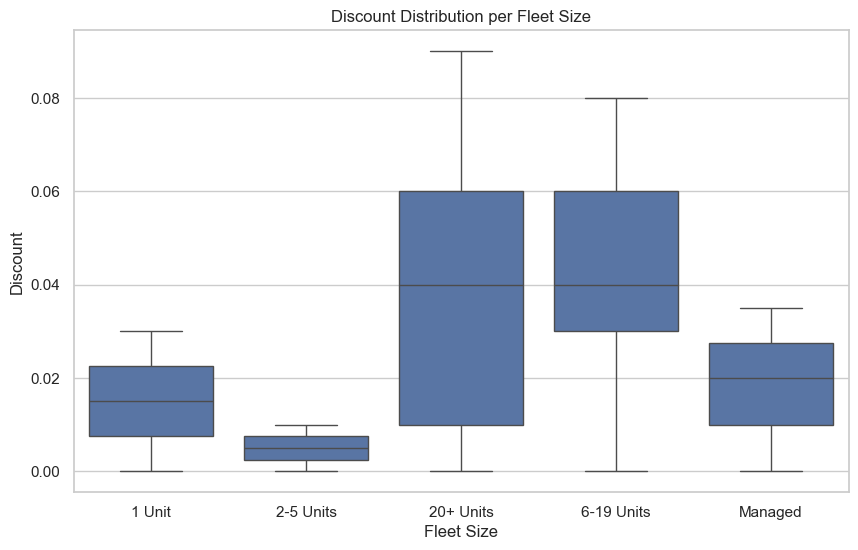

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Fleet Size', y='Discount - Parent', data=fleet_discount_summary)
plt.title('Discount Distribution per Fleet Size')
plt.xlabel('Fleet Size')
plt.ylabel('Discount')
plt.show()

Discounting strategies vary significantly by fleet size, with larger fleets (20+ Units and 6-19 Units) receiving higher and more flexible discounts, while smaller fleets (1 Unit and 2-5 Units) receive minimal discounts. Managed fleets show consistent discounting practices, reflecting stability in pricing policies. 

Market share = Sales / Market Potential;
Please use Gaps to Fill % Target as the key indicator for Availability;
Lost Opportunity = Market potential – Sales

In [21]:
vertical_a_df['Market_share'] = vertical_a_df['Sales (USD)'] / vertical_a_df['Market Potential (USD)']
vertical_a_df['Lost_Opportunity'] = vertical_a_df['Market Potential (USD)'] - vertical_a_df['Sales (USD)']

vertical_a_df.head()

/var/folders/0t/g5p3lp7j739f033nsc__94br0000gn/T/ipykernel_45600/1700562028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vertical_a_df['Market_share'] = vertical_a_df['Sales (USD)'] / vertical_a_df['Market Potential (USD)']
/var/folders/0t/g5p3lp7j739f033nsc__94br0000gn/T/ipykernel_45600/1700562028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vertical_a_df['Lost_Opportunity'] = vertical_a_df['Market Potential (USD)'] - vertical_a_df['Sales (USD)']


,Parent Customer Number,Customer Sub-Vertical,Industry,Second Level Dealer?,Fleet Size,Covered at Parent Level,Parent in CAT?,Discount - Parent,Market Potential (USD),Sales (USD),Market_share,Lost_Opportunity
0,1,Vertical A,Industry G,No,20+ Units,Yes,Yes,0.00,552053.000000,189248.484040,0.342809,362804.515960
1,2,Vertical A,Industry W,No,20+ Units,Yes,Yes,0.00,482917.502141,143925.676649,0.298034,338991.825492
2,3,Vertical A,Industry G,No,20+ Units,Yes,Yes,0.06,422414.992048,84088.635400,0.199066,338326.356648
3,4,Vertical A,Industry G,No,Managed,Yes,Yes,0.00,394918.069432,72290.821680,0.183053,322627.247752
4,5,Vertical A,Industry G,No,20+ Units,Yes,Yes,0.09,625669.235369,315636.963180,0.504479,310032.272189


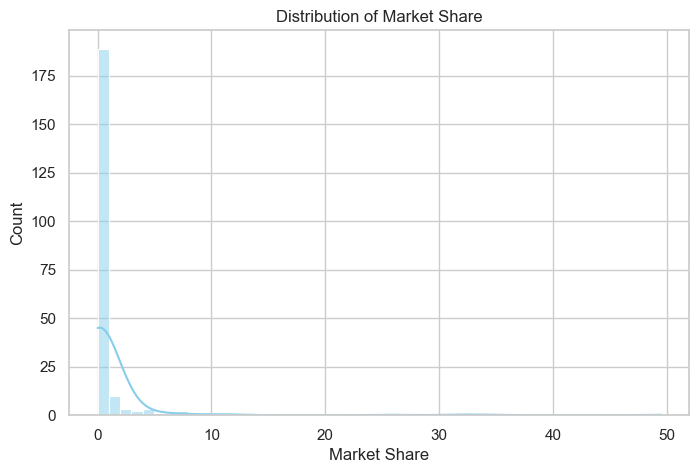

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.histplot(vertical_a_df['Market_share'], kde=True, color='skyblue', bins=50)
plt.title('Distribution of Market Share')
plt.xlabel('Market Share')
plt.ylabel('Count')
plt.show()

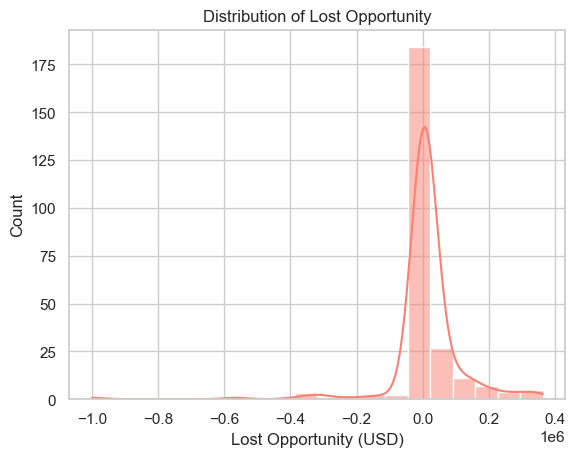

In [23]:
sns.histplot(vertical_a_df['Lost_Opportunity'], kde=True, color='salmon', bins=20)
plt.title('Distribution of Lost Opportunity')
plt.xlabel('Lost Opportunity (USD)')
plt.ylabel('Count')
plt.show()

/Users/mateuszwarmuz/Documents/python/Caterpillar/.venv/lib/python3.10/site-packages/matplotlib/collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


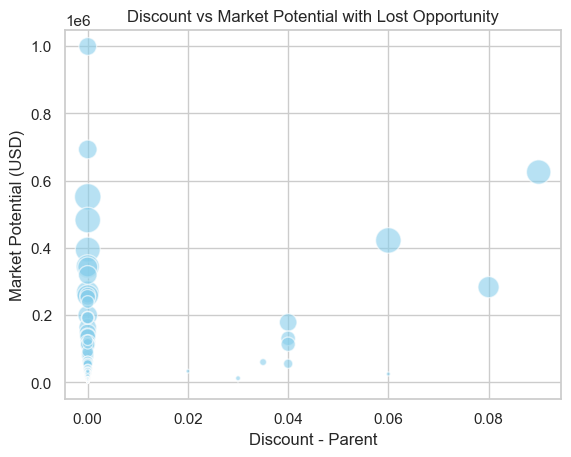

In [ ]:
plt.scatter(
    x=vertical_a_df['Discount - Parent'],
    y=vertical_a_df['Market Potential (USD)'],
    s=vertical_a_df['Lost_Opportunity']/1000,
    alpha=0.6,
    c='skyblue',
    edgecolors='w'
)

plt.xlabel('Discount - Parent')
plt.ylabel('Market Potential (USD)')
plt.title('Discount vs Market Potential with Lost Opportunity')
plt.grid(True)
plt.show()

/Users/mateuszwarmuz/Documents/python/Caterpillar/.venv/lib/python3.10/site-packages/matplotlib/collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/mateuszwarmuz/Documents/python/Caterpillar/.venv/lib/python3.10/site-packages/matplotlib/collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


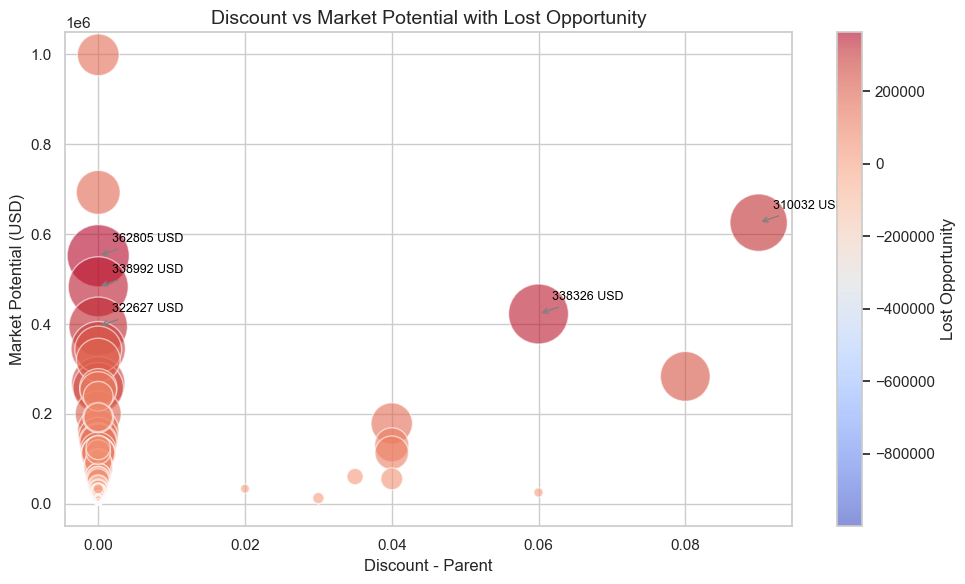

In [ ]:
bubble_size = vertical_a_df['Lost_Opportunity'] / vertical_a_df['Lost_Opportunity'].max() * 2000 
  
colors = vertical_a_df['Lost_Opportunity']  
  
plt.figure(figsize=(10, 6))
scatter = plt.scatter(  
    y=vertical_a_df['Market Potential (USD)'],
    s=bubble_size,
    alpha=0.6,
    c=colors,
    cmap='coolwarm',
    edgecolors='w'
)  
   
cbar = plt.colorbar(scatter)  
cbar.set_label('Lost Opportunity')  
  
top_outliers = vertical_a_df.nlargest(5, 'Lost_Opportunity')
for i, row in top_outliers.iterrows():  
    plt.annotate(  
        f"{row['Lost_Opportunity']:.0f} USD",
        (row['Discount - Parent'], row['Market Potential (USD)']),  
        xytext=(10, 10),
        textcoords='offset points',  
        fontsize=9,  
        color='black',  
        arrowprops=dict(arrowstyle="->", color='gray', lw=1)  
    )  

plt.xlabel('Discount - Parent', fontsize=12)  
plt.ylabel('Market Potential (USD)', fontsize=12)  
plt.title('Discount vs Market Potential with Lost Opportunity', fontsize=14)  
plt.grid(True)  

plt.tight_layout()  
plt.show()  

Most high-potential markets (>600,000 USD) are concentrated near low discounts (0–0.02).

Lost Opportunity measures potential sales that were not captured.

The larger bubbles signify higher values of the Lost_Opportunity variable. This means that areas with larger bubbles represent markets where significant opportunities have been lost.

High market potential is clustered around low discounts, suggesting that offering smaller discounts correlates with better market opportunities.

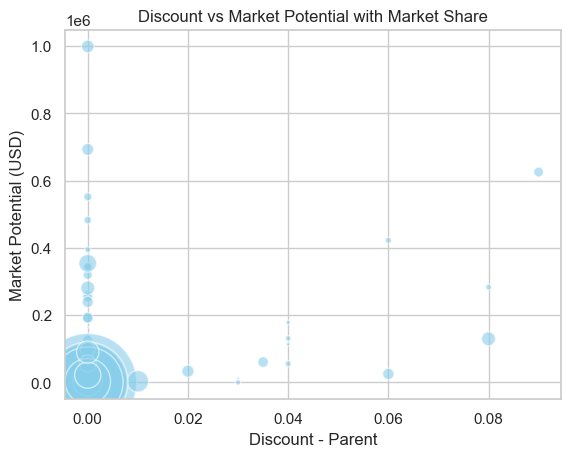

In [ ]:
plt.scatter(
    x=vertical_a_df['Discount - Parent'],
    y=vertical_a_df['Market Potential (USD)'],
    s=vertical_a_df['Market_share']*100,
    alpha=0.6,
    c='skyblue',
    edgecolors='w'
)

plt.xlabel('Discount - Parent')
plt.ylabel('Market Potential (USD)')
plt.title('Discount vs Market Potential with Market Share')
plt.grid(True)
plt.show()

In the high market potential region (>600,000 USD), bubble sizes are relatively small, suggesting that these markets may have untapped market share.

In the higher discount range (>0.04), bubble sizes are small, suggesting that higher discounts do not significantly impact market share.

Markets with low potential (<200,000 USD) dominate in terms of market share but may not provide high financial returns. 

# SHEET 2–4 — Canada Market Analysis

In [28]:
df_sales = pd.read_excel("ESD_Data_Analysis.xlsx", sheet_name="Sheet 2")
df_fill = pd.read_excel("ESD_Data_Analysis.xlsx", sheet_name="Sheet 3")
df_target = pd.read_excel("ESD_Data_Analysis.xlsx", sheet_name="Sheet 4")

In [29]:
df_sales.columns

Index(['Sales Channel', 'Parts Category', '1\nfacing_fills',
       '2\nfacing_fills_terr_adj', '3\nfacing_fills_cat_adj',
       '4\nterritorial_fills', '5\nCat_Facing_Fills', '6\nCat_Search_Fills',
       '7\nmissed_lines', 'total_lines', 'Fill', 'Fill %'],
      dtype='object')

In [30]:
vertical_a_df.shape

(249, 12)

In [31]:
df_sales.shape

(40253, 12)

In [32]:
df_sales.head()

,Sales Channel,Parts Category,1\nfacing_fills,2\nfacing_fills_terr_adj,3\nfacing_fills_cat_adj,4\nterritorial_fills,5\nCat_Facing_Fills,6\nCat_Search_Fills,7\nmissed_lines,total_lines,Fill,Fill %
0,Over-the-Counter,Category A,0,0,0,0,1,0,0,1,0,0.0
1,Over-the-Counter,Category B,0,0,0,2,3,0,0,5,0,0.0
2,Over-the-Counter,Category B,0,0,0,2,0,0,0,2,0,0.0
3,Over-the-Counter,Category B,0,0,0,2,0,0,0,2,0,0.0
4,Over-the-Counter,Category C,0,0,0,0,1,0,0,1,0,0.0


In [33]:
df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
1\nfacing_fills,40253.0,55.448389,467.485714,0.0,0.0,0.000000,7.000,20224.0
2\nfacing_fills_terr_adj,40253.0,7.762701,117.117736,0.0,0.0,0.000000,3.000,18253.0
3\nfacing_fills_cat_adj,40253.0,4.812163,26.497604,0.0,0.0,0.000000,1.000,1103.0
4\nterritorial_fills,40253.0,3.722952,43.600030,0.0,0.0,0.000000,1.000,5704.0
5\nCat_Facing_Fills,40253.0,4.875562,16.308764,0.0,0.0,1.000000,3.000,623.0
6\nCat_Search_Fills,40253.0,0.782029,2.822613,0.0,0.0,0.000000,0.000,82.0
7\nmissed_lines,40253.0,0.408839,1.689331,0.0,0.0,0.000000,0.000,70.0
total_lines,40253.0,77.812635,537.481293,1.0,2.0,6.000000,24.000,24713.0
Fill,40253.0,68.023253,509.936324,0.0,0.0,2.000000,14.000,21421.0
Fill %,40253.0,0.529436,0.434011,0.0,0.0,0.666667,0.975,1.0


In [34]:
df_sales['Sales Channel'].value_counts()

Sales Channel
Over-the-Counter    14731
Others              13571
Online Store         9540
B2B                  2411
Name: count, dtype: int64

In [35]:
df_sales['Parts Category'].value_counts()

Parts Category
Category E    9522
Category A    9186
Category C    6735
Category B    4173
Category D    3977
Category F    3833
Category H    2089
Category G     690
Name: count, dtype: int64

In [36]:
grouped = df_sales.groupby("Parts Category").sum(numeric_only=True).reset_index()
grouped

,Parts Category,1\nfacing_fills,2\nfacing_fills_terr_adj,3\nfacing_fills_cat_adj,4\nterritorial_fills,5\nCat_Facing_Fills,6\nCat_Search_Fills,7\nmissed_lines,total_lines,Fill,Fill %
0,Category A,150839,36873,29944,20039,26883,4734,2150,271462,217656,4750.979249
1,Category B,37478,13891,10634,6899,13964,2329,967,86162,62003,1950.098164
2,Category C,383001,41913,28248,25736,34217,5127,2463,520705,453162,3874.125624
3,Category D,120064,23423,19218,12364,17058,2992,1781,196900,162705,2018.682250
4,Category E,1003575,164579,82816,70401,85237,12991,7161,1426760,1250970,4844.266289
5,Category F,22788,5487,5804,2595,5591,1303,954,44522,34079,1844.030206
6,Category G,467488,19123,10826,8730,6167,871,443,513648,497437,600.262270
7,Category H,46654,7138,6209,3081,7135,1131,536,71884,60001,1390.028000


In [37]:
grouped["Calculated Fill %"] = (grouped["Fill"] / grouped["total_lines"]) * 100

In [38]:
grouped.head()

,Parts Category,1\nfacing_fills,2\nfacing_fills_terr_adj,3\nfacing_fills_cat_adj,4\nterritorial_fills,5\nCat_Facing_Fills,6\nCat_Search_Fills,7\nmissed_lines,total_lines,Fill,Fill %,Calculated Fill %
0,Category A,150839,36873,29944,20039,26883,4734,2150,271462,217656,4750.979249,80.179178
1,Category B,37478,13891,10634,6899,13964,2329,967,86162,62003,1950.098164,71.960957
2,Category C,383001,41913,28248,25736,34217,5127,2463,520705,453162,3874.125624,87.028548
3,Category D,120064,23423,19218,12364,17058,2992,1781,196900,162705,2018.682250,82.633316
4,Category E,1003575,164579,82816,70401,85237,12991,7161,1426760,1250970,4844.266289,87.679077


In [39]:
grouped = grouped.sort_values("total_lines", ascending=False)
grouped.head()

,Parts Category,1\nfacing_fills,2\nfacing_fills_terr_adj,3\nfacing_fills_cat_adj,4\nterritorial_fills,5\nCat_Facing_Fills,6\nCat_Search_Fills,7\nmissed_lines,total_lines,Fill,Fill %,Calculated Fill %
4,Category E,1003575,164579,82816,70401,85237,12991,7161,1426760,1250970,4844.266289,87.679077
2,Category C,383001,41913,28248,25736,34217,5127,2463,520705,453162,3874.125624,87.028548
6,Category G,467488,19123,10826,8730,6167,871,443,513648,497437,600.262270,96.843948
0,Category A,150839,36873,29944,20039,26883,4734,2150,271462,217656,4750.979249,80.179178
3,Category D,120064,23423,19218,12364,17058,2992,1781,196900,162705,2018.682250,82.633316


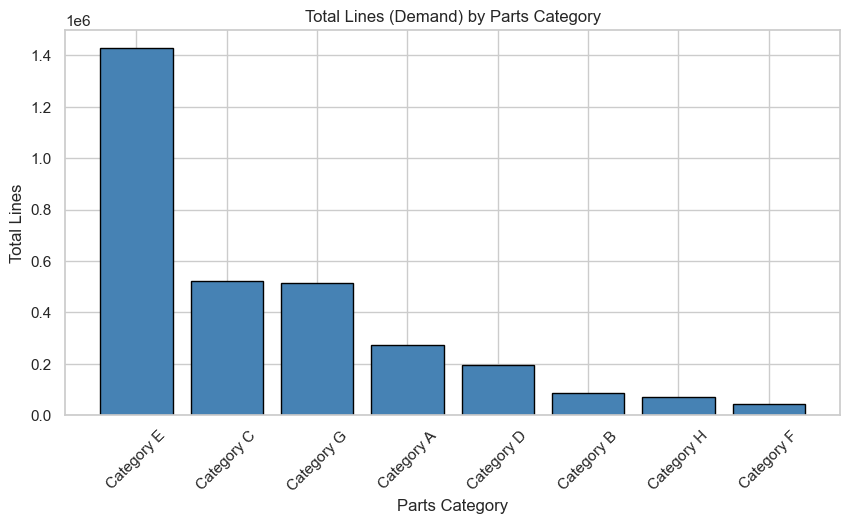

In [40]:
plt.figure(figsize=(10, 5))
plt.bar(grouped["Parts Category"], grouped["total_lines"], color="steelblue", edgecolor="black")
plt.title("Total Lines (Demand) by Parts Category")
plt.xlabel("Parts Category")
plt.ylabel("Total Lines")
plt.xticks(rotation=45)
plt.show()

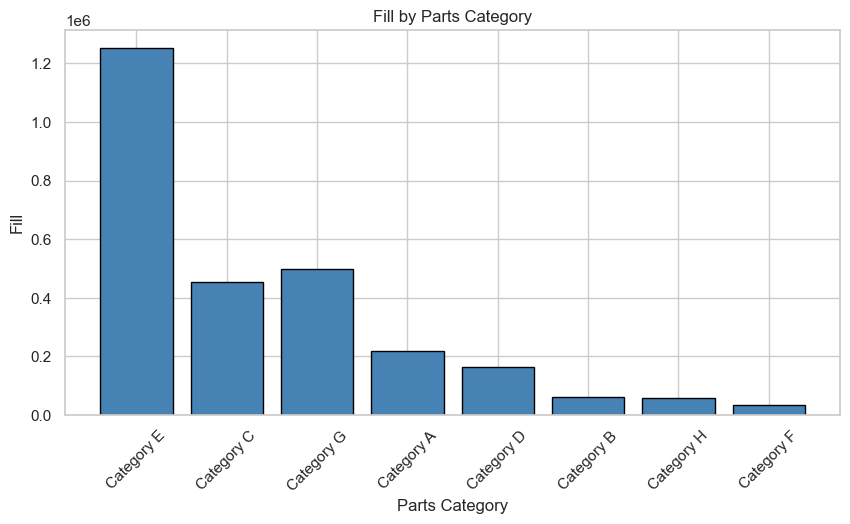

In [41]:
plt.figure(figsize=(10, 5))
plt.bar(grouped["Parts Category"], grouped["Fill"], color="steelblue", edgecolor="black")
plt.title("Fill by Parts Category")
plt.xlabel("Parts Category")
plt.ylabel("Fill")
plt.xticks(rotation=45)
plt.show()

In [42]:
corr = df_sales["Fill"].corr(df_sales["total_lines"])
print(corr)

0.996087964570138


In [ ]:
aggregated_data = df_fill.groupby(["Parts Category", "Measure"])["Values"].sum().reset_index()  
aggregated_data.head()

   Parts Category               Measure        Values
0      Category A  Market Potential Usd  2.317963e+07
1      Category A             Sales Usd  1.219526e+07
2      Category B  Market Potential Usd  1.175176e+07
3      Category B             Sales Usd  4.130997e+06
4      Category C  Market Potential Usd  2.261810e+07
5      Category C             Sales Usd  8.481440e+06
6      Category D  Market Potential Usd  1.707886e+07
7      Category D             Sales Usd  8.496542e+06
8      Category E  Market Potential Usd  3.035329e+07
9      Category E             Sales Usd  2.407761e+07
10     Category F  Market Potential Usd  4.468621e+07
11     Category F             Sales Usd  1.769384e+07
12     Category G  Market Potential Usd  1.963522e+07
13     Category G             Sales Usd  7.493853e+06
14     Category H  Market Potential Usd  2.626880e+07
15     Category H             Sales Usd  8.482605e+06


<Figure size 1000x600 with 0 Axes>

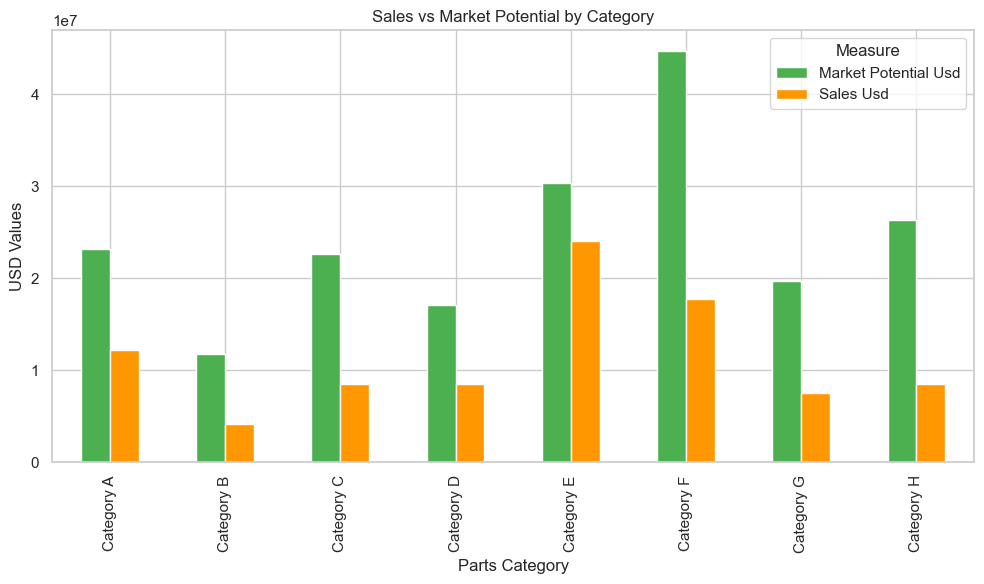

In [ ]:
pivot_data = aggregated_data.pivot(index="Parts Category", columns="Measure", values="Values").reset_index()  

plt.figure(figsize=(10, 6))  
pivot_data.plot(x="Parts Category", kind="bar", stacked=False, figsize=(10, 6), color=["#4CAF50", "#FF9800"])  
plt.title("Sales vs Market Potential by Category")  
plt.ylabel("USD Values")  
plt.xlabel("Parts Category")  
plt.legend(title="Measure")  
plt.tight_layout()  
plt.show()  

Categories E and F have the highest market potential. However, Category E has a significant gap between sales and market potential, highlighting a need for strategies to increase sales in this category. Investigate why sales are lagging behind market potential and implement strategies to capture more of the market 

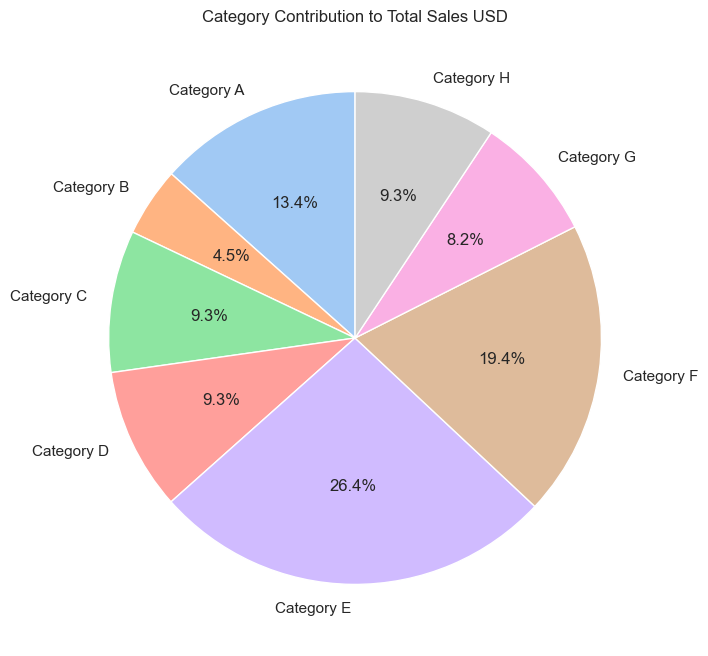

In [ ]:
sales_data = aggregated_data[aggregated_data["Measure"] == "Sales Usd"]  

plt.figure(figsize=(8, 8))  
plt.pie(sales_data["Values"], labels=sales_data["Parts Category"], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))  
plt.title("Category Contribution to Total Sales USD")  
plt.show()  

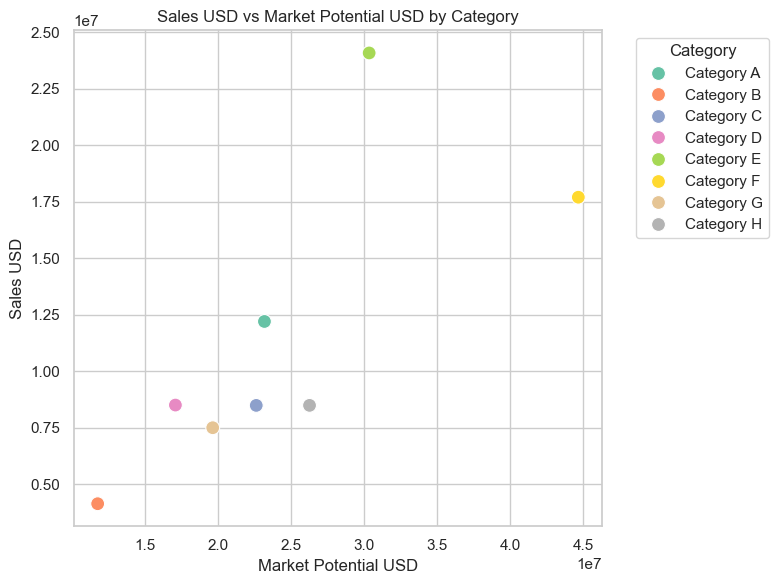

In [ ]:
sales = aggregated_data[aggregated_data["Measure"] == "Sales Usd"]  
market_potential = aggregated_data[aggregated_data["Measure"] == "Market Potential Usd"]  
  
comparison_data = sales.merge(market_potential, on="Parts Category", suffixes=("_Sales", "_Market"))  

plt.figure(figsize=(8, 6))  
sns.scatterplot(x="Values_Market", y="Values_Sales", data=comparison_data, hue="Parts Category", palette="Set2", s=100)  
plt.title("Sales USD vs Market Potential USD by Category")  
plt.xlabel("Market Potential USD")  
plt.ylabel("Sales USD")  
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()  

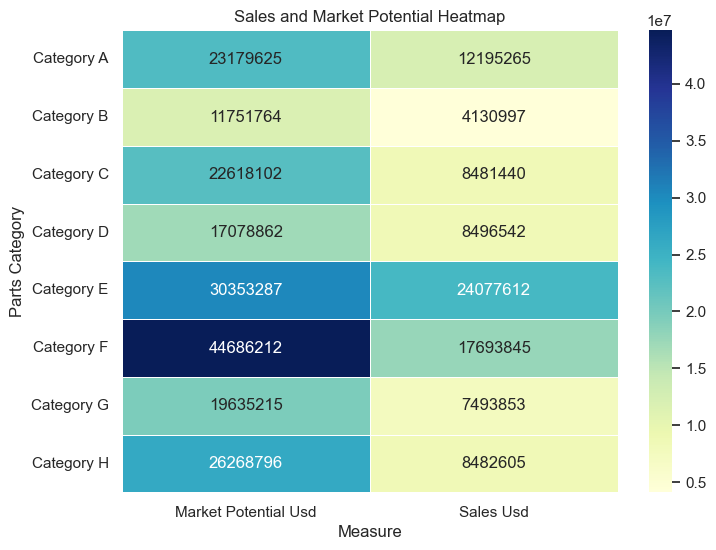

In [ ]:
heatmap_data = aggregated_data.pivot(index="Parts Category", columns="Measure", values="Values")  

plt.figure(figsize=(8, 6))  
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)  
plt.title("Sales and Market Potential Heatmap")  
plt.ylabel("Parts Category")  
plt.xlabel("Measure")  
plt.show()  

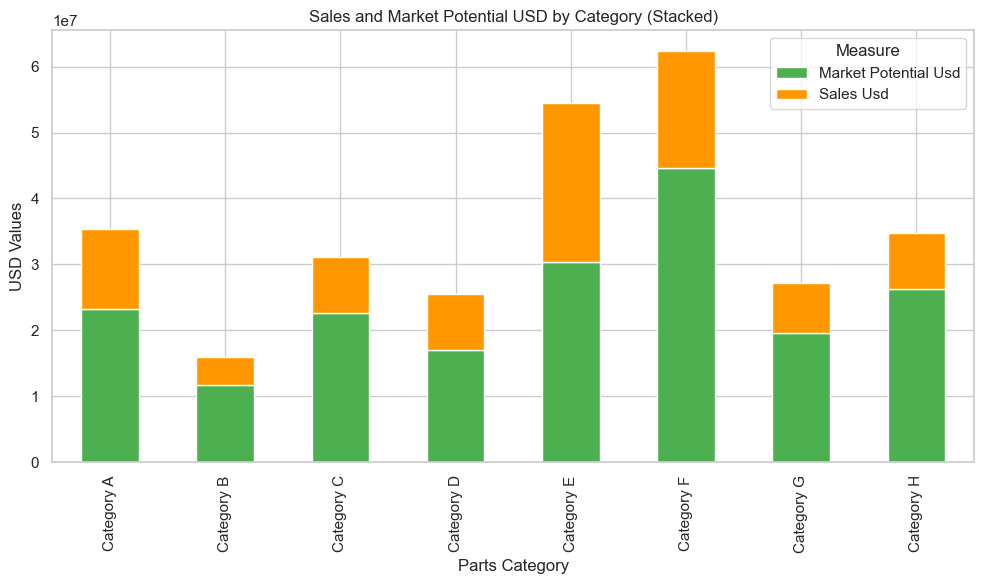

In [ ]:
pivot_data.plot(x="Parts Category", kind="bar", stacked=True, figsize=(10, 6), color=["#4CAF50", "#FF9800"])  
plt.title("Sales and Market Potential USD by Category (Stacked)")  
plt.ylabel("USD Values")  
plt.xlabel("Parts Category")  
plt.legend(title="Measure")  
plt.tight_layout()  
plt.show()  